# Machine Learning Lab

# Assignment 4

# Simran Kaur

# 311443

# Exercise 0: Dataset preprocessing

Importing all the Libraries

In [751]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [218]:
with open("tic-tac-toe.names") as f:
    print(f.read())

1. Title: Tic-Tac-Toe Endgame database

2. Source Information
   -- Creator: David W. Aha (aha@cs.jhu.edu)
   -- Donor: David W. Aha (aha@cs.jhu.edu)
   -- Date: 19 August 1991
 
3. Known Past Usage: 
   1. Matheus,~C.~J., \& Rendell,~L.~A. (1989).  Constructive
      induction on decision trees.  In {\it Proceedings of the
      Eleventh International Joint Conference on Artificial Intelligence} 
      (pp. 645--650).  Detroit, MI: Morgan Kaufmann.
      -- CITRE was applied to 100-instance training and 200-instance test
         sets.  In a study using various amounts of domain-specific
         knowledge, its highest average accuracy was 76.7% (using the
         final decision tree created for testing).

   2. Matheus,~C.~J. (1990). Adding domain knowledge to SBL through
      feature construction.  In {\it Proceedings of the Eighth National
      Conference on Artificial Intelligence} (pp. 803--808). 
      Boston, MA: AAAI Press.
      -- Similar experiments with CITRE, includes 

Tic-tac-toe dataframe

In [752]:
tic_tac = pd.read_csv("tic-tac-toe.data", header = None, names = ["top-left-square", "top-middle-square", "top-right-square", "middle-left-square", "middle-middle-square", "middle-right-square", "bottom-left-square", "bottom-middle-square", "bottom-right-square", "Class"])
tic_tac

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


Replacing the non-numerical values by numerical values using dictionary which has keys as the non-numerical entries and values as numerical entries assigned by us.

In [753]:
values = {'x': 3, 'o': 4, 'b': 5, 'positive': 1, 'negative': 2}
tic_tac_toe = tic_tac.replace(values)
tic_tac_toe

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,3,3,3,3,4,4,3,4,4,1
1,3,3,3,3,4,4,4,3,4,1
2,3,3,3,3,4,4,4,4,3,1
3,3,3,3,3,4,4,4,5,5,1
4,3,3,3,3,4,4,5,4,5,1
...,...,...,...,...,...,...,...,...,...,...
953,4,3,3,3,4,4,4,3,3,2
954,4,3,4,3,3,4,3,4,3,2
955,4,3,4,3,4,3,3,4,3,2
956,4,3,4,4,3,3,3,4,3,2


Calculating the percentage of Positive and negative values in our dataframe

In [754]:
p = ((tic_tac_toe["Class"] == 1).sum()/len(tic_tac_toe))*100
n = ((tic_tac_toe["Class"] == 2).sum()/len(tic_tac_toe))*100

In [755]:
p

65.34446764091858

In [250]:
n

34.65553235908142

As we can see that the positive class outnumbers the negative class, therefore our dataset is unbalanced.

Sampling the data in a way such that the dominating class also occurs in a same fraction as the other one. To do this we sample our positive class by a fraction of (# negative class / # postive class).

In [760]:
f = n/p
tic_tac_game1 = tic_tac_toe.query("Class == 1").sample(frac = f)
tic_tac_game2 = tic_tac_toe.query("Class == 2")

Combining the above two dataframes

In [761]:
frames = [tic_tac_game1, tic_tac_game2]
tic_tac_game = pd.concat(frames)

In [762]:
tic_tac_game

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
305,4,3,3,4,3,5,5,3,4,1
475,4,5,5,3,3,3,4,5,5,1
339,4,3,4,5,3,4,5,3,3,1
48,3,3,3,4,5,5,5,4,5,1
108,3,3,5,4,3,4,5,4,3,1
...,...,...,...,...,...,...,...,...,...,...
953,4,3,3,3,4,4,4,3,3,2
954,4,3,4,3,3,4,3,4,3,2
955,4,3,4,3,4,3,3,4,3,2
956,4,3,4,4,3,3,3,4,3,2


Reshuffling so that the positive and negative class values occurs randomly in the dataset.

In [763]:
tic_tac_game = tic_tac_game.sample(frac = 1)
tic_tac_game

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
131,3,4,3,4,3,5,5,4,3,1
329,4,3,4,4,3,3,3,3,4,1
99,3,3,4,5,3,5,4,3,4,1
652,3,3,4,5,4,3,4,4,3,2
648,3,3,4,5,3,3,4,4,4,2
...,...,...,...,...,...,...,...,...,...,...
112,3,3,5,5,3,4,4,4,3,1
800,4,3,5,5,4,3,3,5,4,2
833,4,4,4,4,3,3,3,5,3,2
247,3,5,4,3,4,3,3,4,5,1


Spliting the data into training(8ß%) and test(20%).

In [764]:
def split(file):
    r, c = np.shape(file)
    size = int(0.8*r)
    train = file.iloc[0:size]
    test = file.iloc[size :]
    return train, test


# Exercise 1: Logistic Regression with Gradient Descent

Sigmoid function is defined as below:-

In [765]:
def sigmoid(X,beta):
    sig = (1/(1 + np.exp(-(np.dot(X, beta))))).reshape(-1,1)
    return sig

Loglikelihood function returns the likelihood of the prediction with the given beta

In [767]:
def log_likelihood(X, Y, beta):
    s = 0
    for i in range(len(X)):
        s += Y[i]*np.dot(X[i], beta) - np.log(1 + np.exp(np.dot(X[i], beta)))
    return s[0]
                                                              

Gradient of the Loglikelihood is defined as below:-

In [769]:
def log_likelihood_grad(X, Y, beta):
    return np.dot(X.T, np.subtract(Y , sigmoid(X, beta)))

Second order gradient (Hessian matrix) for the Loglikelihood function

In [885]:
def log_likelihood_grad_2(X, Y, beta):
    m = len(X)
    n = len(X[0])
    grad = np.zeros(n)
    f = np.zeros((m, 1))
    H = np.zeros((n, n))
    f = sigmoid(X, beta)   
    I = np.ones((m, 1))
    w = np.multiply(f, (I - f))
    W = np.zeros((m, m), float)
    np.fill_diagonal(W, w)
    H = np.dot(np.dot(X.transpose(), W), X)
    return H
    

Bold Driver function to calculate step length for a given beta.

In [772]:
def boldDriver(X, Y, beta, alpha_old, a, b):
    alpha = alpha_old*a
    m, n = np.shape(X)
    beta_new = np.zeros((n,1))
    beta_new = beta + alpha*(log_likelihood_grad(X, Y, beta))
    while log_likelihood(X, Y, beta_new) - log_likelihood(X, Y, beta) <= 0:
        beta = np.array(beta_new)
        beta_new = beta + alpha*(log_likelihood_grad(X, Y, beta))
        alpha = alpha*b
    return alpha

Gradient Ascent for the logistic regression to find beta such that the log likelihood is maximum at that beta.

In [912]:
def gradient_ascent(X, Y, X_t, Y_t, beta, i_max, epsilon, alpha_old, a, b):
    m, n = np.shape(X)
    beta_new = np.zeros((n, 1))
    diff = np.zeros(i_max)
    logLoss = np.zeros(i_max)
    for k in range(i_max):
        beta_new = beta + (boldDriver(X, Y, beta, alpha_old, a, b))*(log_likelihood_grad(X, Y, beta))
        diff[k] = abs(log_likelihood(X, Y, beta) - log_likelihood(X, Y, beta_new))
        logLoss[k] = log_likelihood(X_t, Y_t, beta)
        if (abs(log_likelihood(X, Y, beta) - log_likelihood(X, Y, beta_new)) < epsilon):
            return beta_new, diff, logLoss
        else:
            beta = np.array(beta_new)
    return beta_new, diff, logLoss        
        

The Extract function takes the given dataframe and returns the training features, training target, test features and test target.

In [776]:
def Extract(f, col_name):
    train, test = split(f)
    r, c = np.shape(train)
    x_train = train.loc[:, train.columns != col_name]
    x_train = x_train.to_numpy()
    bias_column1 = np.ones(shape=(r,1))
    X_train = np.append(bias_column1,x_train,axis=1)
    y_train = train.loc[:, train.columns == col_name]
    Y_train = y_train.to_numpy()
    k, l = np.shape(test)
    x_test = test.loc[:, test.columns != col_name]
    x_test = x_test.to_numpy()
    bias_column2 = np.ones(shape=(k,1))
    X_test = np.append(bias_column2,x_test,axis=1)
    y_test = test.loc[:, test.columns == col_name]
    Y_test = y_test.to_numpy()
    return X_train, Y_train, X_test, Y_test

In [789]:
tic_train_features, tic_train_target, tic_test_features, tic_test_target = Extract(tic_tac_game, "Class")

Calling gradient ascent on our tic-tac-toe dataset

In [913]:
rows, col = np.shape(tic_train_features)
beta = np.zeros((col, 1))
beta_lr, diff_lr, loss_lr = gradient_ascent(tic_train_features, tic_train_target, tic_test_features, tic_test_target, beta, 500, 10**(-3), 10**(-9), 1, 0.1)

In [914]:
beta_lr

array([[0.0002636 ],
       [0.00099518],
       [0.00100555],
       [0.00099816],
       [0.00100532],
       [0.00100396],
       [0.00100034],
       [0.00101037],
       [0.00100006],
       [0.00100688]])

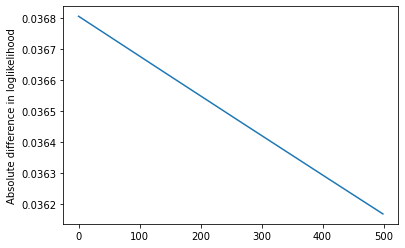

In [915]:
abs_diff_lr = diff_lr    
plt.plot(abs_diff_lr)
plt.ylabel('Absolute difference in loglikelihood')
plt.show()

Our motive is to find such beta's such that the loglikelihood is maximum.
As gradient ascent tends to find such beta's so with each iteration the new beta's improves our loglikelihood and hence in the beginning the absolute difference in loglikelihood is high and then slowly when we move towards the optimal beta's this difference is negligible and tends to zero.
Thus the shape of our plot is a decreasing curve.

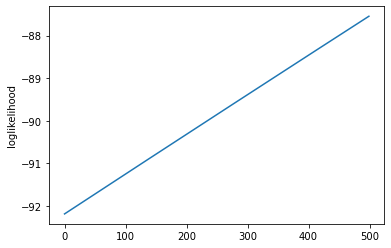

In [916]:
log_loss = loss_lr    
plt.plot(log_loss)
plt.ylabel('loglikelihood')
plt.show()

Our motive is to find such beta's such that the loglikelihood is maximum. As gradient ascent tends to find such beta's so with each iteration the new beta's improves our loglikelihood on the test data and hence the loglikelihood is increasing with each iteration. Thus the shape of our plot is an increasing curve.

# Exercise 2: Implement Newton Algorithm for Logistic Regression

Newton Algorithm for Logistic regression

In [917]:
def newton_maximize(X, Y, X_t, Y_t, beta, i_max, epsilon, alpha_old, a, b):
    diff = np.zeros(i_max)
    logLoss = np.zeros(i_max)    
    for i in range(i_max):
        g = log_likelihood_grad(X, Y, beta)
        h = log_likelihood_grad_2(X, Y, beta)
        beta_new = beta + (boldDriver(X, Y, beta, alpha_old, a, b))*(np.dot(np.linalg.inv(h), g))
        diff[i] = abs(log_likelihood(X, Y, beta) - log_likelihood(X, Y, beta_new))
        logLoss[i] = log_likelihood(X_t, Y_t, beta_new)
        if (abs(log_likelihood(X, Y, beta) - log_likelihood(X, Y, beta_new)) < epsilon):
            return beta_new, diff, logLoss
        else:
            beta = np.array(beta_new)
    return beta_new, diff, logLoss        
        

In order to make this algorithm fast the step length has benn found using boldDriver algorithm.

In [918]:
rows, col = np.shape(tic_train_features)
beta = np.zeros((col, 1))
beta_newton, diff_newton, loss_newton = newton_maximize(tic_train_features, tic_train_target, tic_test_features, tic_test_target, beta, 200, 10**(-3), 10**(-3), 1, 0.1)

In [919]:
beta_newton

array([[ 0.78185519],
       [ 0.02933235],
       [-0.04977814],
       [ 0.01539165],
       [-0.04181807],
       [ 0.10300211],
       [-0.04539716],
       [ 0.03680058],
       [-0.07273985],
       [ 0.02467307]])

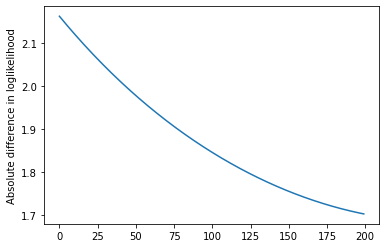

In [920]:
abs_diff_newton = diff_newton    
plt.plot(abs_diff_newton)
plt.ylabel('Absolute difference in loglikelihood')
plt.show()

The absolute difference between loglikelihood at old and new beta tend to decrease as the number of iteration increase since we need to stop at a beta such that the lohlikelihood doesn't increase anymore after optimal beta has been found. This can be seen in the plot, as the number of iterations is increasing the difference is decreasing and hence algorithm works fine.

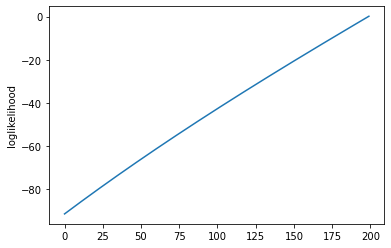

In [921]:
log_loss_newton = loss_newton    
plt.plot(loss_newton)
plt.ylabel('loglikelihood')
plt.show()

The loglikelihood at each new beta tend to increase as the number of iteration increase since our goal is to find such beta's that maximizes loglikelihood function. This can be seen in the plot, as the number of iterations is increasing the loglikelihood on the test data is increasing and hence algorithm works fine.